# Importando as bibliotecas.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tratando o arquivo "googleplaystore.csv".

In [5]:
arquivocsv = pd.read_csv('googleplaystore.csv', index_col=False)
arquivocsv = arquivocsv.drop_duplicates()
arquivocsv['Installs'] = arquivocsv['Installs'].str.replace(r'\D', '', regex=True)
arquivocsv['Price'] = arquivocsv['Price'].str.replace(r'\D', '', regex=True)
arquivocsv['Reviews'] = arquivocsv['Reviews'].str.replace(r'\D', '', regex=True)
arquivocsv.to_csv('semDuplicadas.csv', index=False)


# Top 5 apps por número de instalação (gráfico de barras).

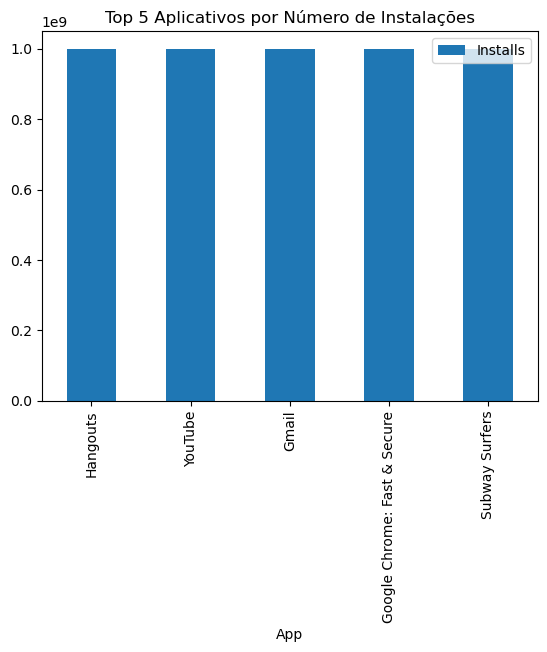

In [6]:


top5 = pd.read_csv('semDuplicadas.csv', index_col=False)
top5ordenado = top5.sort_values(by='Installs', ascending=False)
top_5 = top5ordenado.head(5)

top_5.to_csv('top5installs.csv', index=False)
top_5.plot(kind='bar', x='App', y='Installs', title='Top 5 Aplicativos por Número de Instalações')
plt.show()


# Gráfico de pizza.

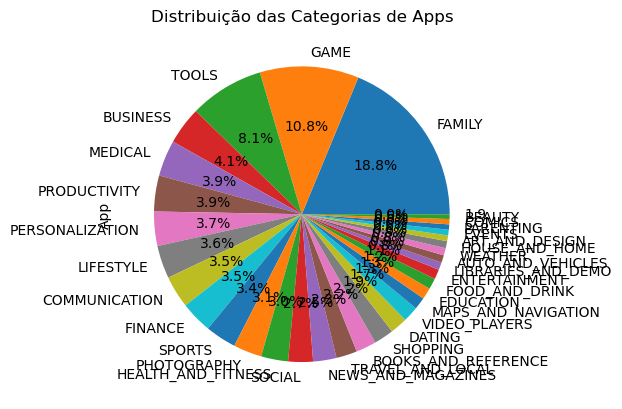

In [7]:
categorias = arquivocsv.groupby('Category')['App'].count()
categorias = categorias.sort_values(ascending=False)
categorias.plot.pie(autopct='%1.1f%%')

categorias.to_csv('categori')
plt.title('Distribuição das Categorias de Apps')
plt.show()

# App mais caro existente no dataseat.

In [8]:
maisCaro = pd.read_csv('semDuplicadas.csv', index_col=False)
appMaisCaro = maisCaro.sort_values(by='Price', ascending=False)
app_mais_caro = appMaisCaro.head(1)

print(app_mais_caro['App'])

3913    I'm Rich - Trump Edition
Name: App, dtype: object


# Apps classificados como 'Mature 17+'.

In [9]:
mature_17 = arquivocsv[arquivocsv['Content Rating'] == 'Mature 17+']
quantosMature17 = len(mature_17)
print(quantosMature17)

447


# Top 10 apps pelo número de reviews.

In [11]:
top10 = pd.read_csv('semDuplicadas.csv')
top10agrupado = top10.groupby('App')['Reviews'].sum().reset_index()
top10_ordenado = top10agrupado.sort_values(by='Reviews', ascending=False)
top_10 = top10_ordenado.head(10)

print(top_10)

                                           App    Reviews
5399                                 Instagram  199664676
4328                                  Facebook  156286514
8080                            Subway Surfers  138606606
9042                        WhatsApp Messenger  138228988
2564                            Clash of Clans  134667058
6166  Messenger – Text and Video Chat for Free  113289425
2364                          Candy Crush Saga  112134492
101                                8 Ball Pool   99386198
2561                              Clash Royale   92530298
7890                                  Snapchat   68045010


# Top 10 apps mais caros.

In [386]:
maisCaros = pd.read_csv('semDuplicadas.csv')
appsMaisCaros = maisCaros.sort_values(by='Price', ascending=False)
apps_mais_caros = appsMaisCaros.head(10)

print(apps_mais_caros['App'])

3913             I'm Rich - Trump Edition
4917                   I AM RICH PRO PLUS
9453    I'm Rich/Eu sou Rico/أنا غني/我很有錢
3908                           💎 I'm rich
4906                        I Am Rich Pro
3745               most expensive app (H)
4903                   I am rich(premium)
4895                            I am rich
4898                       I am Rich Plus
4908       I am rich (Most expensive app)
Name: App, dtype: object


# Top 100 apps pior avaliados.

In [419]:
pioresAgrupados = arquivocsv.groupby('App')['Rating'].mean().reset_index()
top100Piores = pioresAgrupados.sort_values('Rating').head(100)

top100Piores.to_csv('top100')
print(top100Piores)

                                                   App  Rating
2048                                    CJ DVD Rentals     1.0
8455                                    Thistletown CI     1.0
2560                                     Clarksburg AH     1.0
5255                           House party - live chat     1.0
5894  Lottery Ticket Checker - Florida Results & Lotto     1.0
...                                                ...     ...
3090                                        DV KING 4K     2.3
2235                                     CV-RECORD Pro     2.3
2923                         DK Eyewitness Audio Walks     2.3
1111                                 BJ's Express Scan     2.3
1573                                      Bg TV Online     2.3

[100 rows x 2 columns]


# Criando os gráficos dos indicadores acima.

C:\Users\Jhoann7\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jhoann7\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jhoann7\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jhoann7\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37666 (\N{CJK UNIFIED IDEOGRAPH-9322}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jhoann7\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

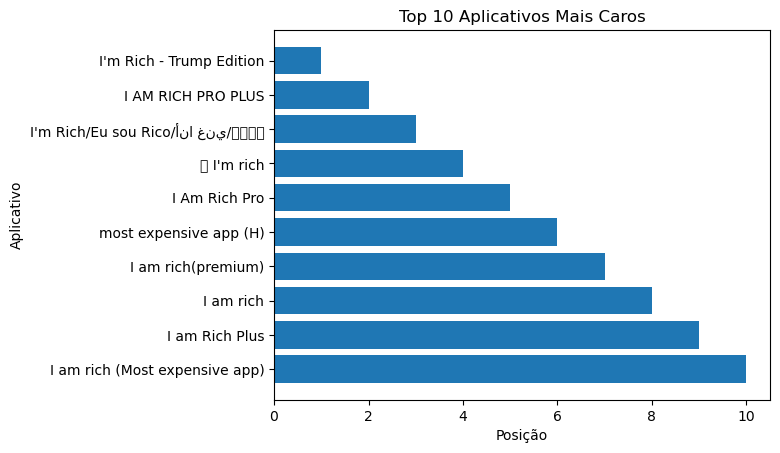

In [420]:
maisCaros = pd.read_csv('semDuplicadas.csv')
appsMaisCaros = maisCaros.sort_values(by='Price', ascending=False)
apps_mais_caros = appsMaisCaros.head(10)

plt.barh(apps_mais_caros['App'], range(1, 11))

plt.xlabel('Posição')
plt.ylabel('Aplicativo')
plt.title('Top 10 Aplicativos Mais Caros')
plt.gca().invert_yaxis()

plt.show()

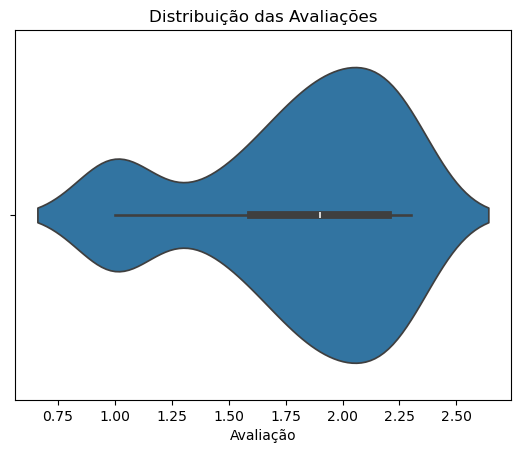

In [415]:
pioresAgrupados = arquivocsv.groupby('App')['Rating'].mean().reset_index()
top10Piores = pioresAgrupados.sort_values('Rating').head(100)

sns.violinplot(x=top10Piores['Rating'])
plt.title('Distribuição das Avaliações')
plt.xlabel('Avaliação')
plt.show()